In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets
from torchsummary import summary

In [2]:
n_pts = 500
centers = [[-0.5, 0.5], [0.5, -0.5]]
#generate a cluster of random points centered around a chosen central point
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
print(X.shape)
#print(y)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(n_pts, 1))

(500, 2)


In [3]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])

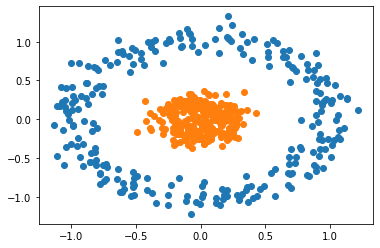

In [4]:
scatter_plot()

In [5]:
class Model(nn.Module):
    def __init__(self, input_size, H1, output_size):
        super(Model, self).__init__()
        self.linear = nn.Linear(input_size, H1) 
        self.linear2 = nn.Linear(H1, output_size)
        #returns a linear outcome, in this case: return [x1, x2] x [w1, w2]^T + [b1]
    def forward(self, x):
        x = torch.sigmoid(self.linear(x)) #transformed to probability 1/(1+e^x)
        x = torch.sigmoid(self.linear2(x))
        return x
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else: return 0

In [6]:
torch.manual_seed(2)
model = Model(2, 4, 1) # 4 Nodes in Hidden Layer
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # PyTorch v0.4.0
model = Model(2,4,1).to(device)

summary(model, (1, 1, 2))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 1, 1, 4]              12
            Linear-2              [-1, 1, 1, 1]               5
Total params: 17
Trainable params: 17
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [8]:
criterion = nn.BCELoss() #Binary Cross-Entropy Loss, aka Sigmoid Cross-Entropy loss
optimizer = torch.optim.SGD(model.parameters() ,lr=0.1)

In [9]:
epochs = 20000
losses = []
for i in range(epochs):
    if ((i+1) % (epochs/100) == 0):
        print (int(((i+1) / epochs) * 100), '%', "Loss =", loss.item())
    x_data = x_data.to(device)
    y_data = y_data.to(device)
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    #print("epoch", i, "loss", loss.item())
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

1 % Loss = 0.6935439705848694
2 % Loss = 0.6933737993240356
3 % Loss = 0.6932189464569092
4 % Loss = 0.693068265914917
5 % Loss = 0.6929114460945129
6 % Loss = 0.6927376985549927
7 % Loss = 0.6925339698791504
8 % Loss = 0.6922830939292908
9 % Loss = 0.6919611096382141
10 % Loss = 0.6915327310562134
11 % Loss = 0.6909452080726624
12 % Loss = 0.6901179552078247
13 % Loss = 0.6889272332191467
14 % Loss = 0.6871871948242188
15 % Loss = 0.6846279501914978
16 % Loss = 0.6808868646621704
17 % Loss = 0.6755352020263672
18 % Loss = 0.6681567430496216
19 % Loss = 0.6584450006484985
20 % Loss = 0.646202802658081
21 % Loss = 0.6311419606208801
22 % Loss = 0.6125908493995667
23 % Loss = 0.5894634127616882
24 % Loss = 0.5608561038970947
25 % Loss = 0.5272953510284424
26 % Loss = 0.4915924072265625
27 % Loss = 0.4576236605644226
28 % Loss = 0.4280119240283966
28 % Loss = 0.4033052325248718
30 % Loss = 0.3826046884059906
31 % Loss = 0.36425885558128357
32 % Loss = 0.34613263607025146
33 % Loss = 0.325

Text(0.5, 0, 'Epoch')

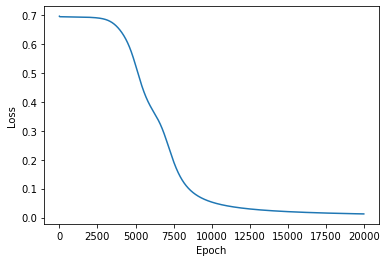

In [10]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("Epoch")

In [11]:
def plot_decision_boundary(X, y):
    x_span = np.linspace(min(X[:, 0])-.25, max(X[:, 0])+.25)
    y_span = np.linspace(min(X[:, 1])-.25, max(X[:, 1])+.25)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()]).to(device);
    pred_func = model.forward(grid)
    z = pred_func.view(xx.shape).detach().cpu().numpy()
    plt.contourf(xx, yy, z)

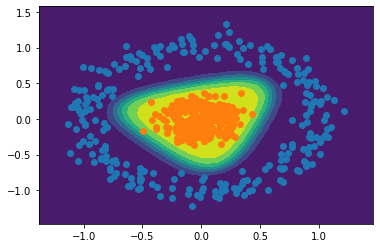

In [12]:
plot_decision_boundary(X, y)
scatter_plot()

Prediction is  1


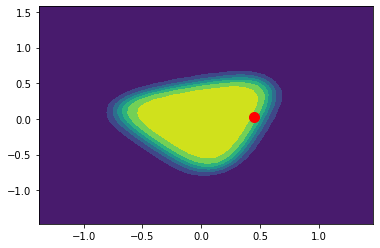

In [13]:
point_x, point_y = 0.45, 0.025
point = torch.Tensor([point_x, point_y]).to(device)
prediction = model.predict(point)
plt.plot([point_x], [point_y], marker='o', markersize=10, color="red")
print ("Prediction is ", prediction)
plot_decision_boundary(X,y)